# **Python Driving License: Analyzing battery charge/discharge data (nucleation overpotential)**

In a battery cell charge/discharge test run by a potentiostat, you can apply different current densities, potentials, and control various parameters such as capacity, time, etc., to conduct your test and analyze the electrochemical behavior of your battery cell. The charge/discharge plot (Voltage versus Time) is one of the most critical pieces of data obtained from this test, from which many pieces of information can be interpreted. One of the most significant factors affecting a battery is nucleation overpotential.The voltage difference between the most dropped point and the plateau is called Nucleation overpotential. 

The objective of this script is to take the data generated by the potentiostat, process it, and conduct computations to derive the pertinent values associated with the nucleation overpotential in a battery cell.


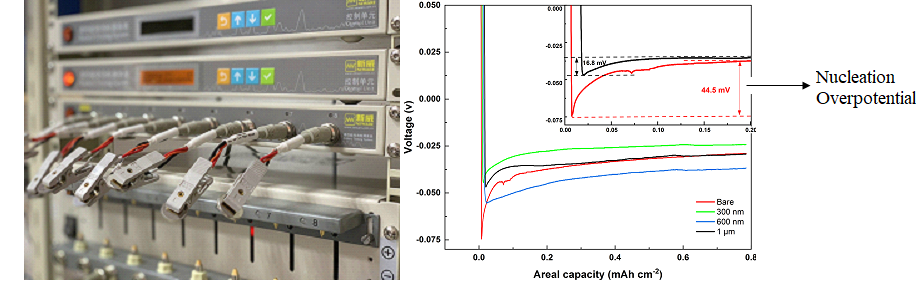

 **Now filtering data and selecting the desired region**
 
 The nucleation overpotential is determined from the discharging (plating) portion of the V-T diagram, so we simply filter out the data from the charging process here. Also, if the current density (C_rate) changes, it will get the mean and std values of eaxh group in the same Crates.
 
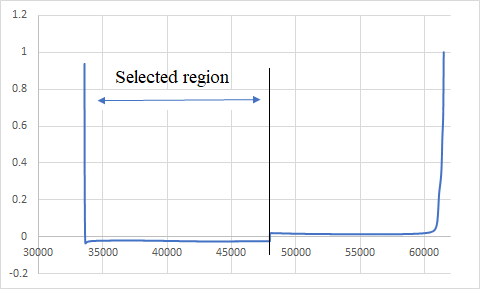

#Finding the minimum Voltage in the filtered region

The minimum voltage at the discharging stage is calulated here, also the corresponding datapoint or time is shown.

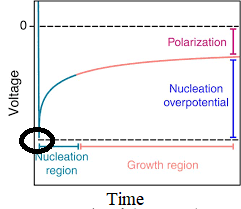


We filter out data before the minimum voltage and then identify the maximum voltage within each cycle. Afterward, we calculate the absolute value of the difference between the maximum and minimum voltages. 


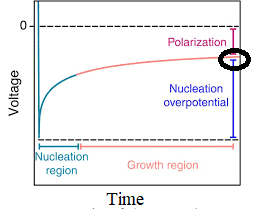

In [10]:
#Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt

#Reading the CSV file
df=pd.read_csv(r"C:\Users\pafzali\OneDrive - Politecnico di Milano\Desktop\python\1.csv")

#Filtering the columns based on dicharge step
filtered_df=df[df['Step Type']=='CC DChg']

#Finding the minimum voltage index in each Cycle
min_voltage_index_of_cycle = filtered_df.groupby('Cycle Index')['Voltage(V)'].idxmin()

#storing the calculated data for each cycle after being filtered
cycle_indices=[]
crate_values=[]
nucleation_overpotential=[]
#loop for going over through the cycles 
for cycle_index in range(1, 31):
    min_voltage_index= min_voltage_index_of_cycle.loc[cycle_index]
    current_value= df.loc[min_voltage_index,'Current(A)']
    #calculating crate
    capacity=0.000785
    c_rate= round(abs(current_value / capacity),2)

    cycle_indices.append(cycle_index)
    crate_values.append(c_rate)

#Calculating  nucleation overpotential
 #filtering rows in the dataframe where the Cycle Index is equal to the current cycle index 
    cycle_data= filtered_df[(filtered_df['Cycle Index'] == cycle_index) & (filtered_df.index >= min_voltage_index)]
    #and filtering rows where the index is greater than or equal to the previously determined minimum voltage index. 
    #so upto here the data frame corresponds to the data or the current cycle starting from the minimum voltage point.
    
    #Calculating maximum and minimum voltage
    max_voltage= cycle_data ['Voltage(V)'].max()
    min_voltage= cycle_data['Voltage(V)'].min()
    voltage_difference= abs(max_voltage - min_voltage)

    nucleation_overpotential.append(voltage_difference)
#Create DataFrame
data = pd.DataFrame({'Cycle Index': cycle_indices, 'C-rate': crate_values, 'Nucleation Overpotential': nucleation_overpotential})
print(data)

    Cycle Index  C-rate  Nucleation Overpotential
0             1    0.25                    0.0344
1             2    0.25                    0.0015
2             3    0.25                    0.0003
3             4    0.25                    0.0003
4             5    0.25                    0.0006
5             6    0.50                    0.0003
6             7    0.50                    0.0003
7             8    0.50                    0.0003
8             9    0.50                    0.0003
9            10    0.50                    0.0003
10           11    1.00                    0.0028
11           12    1.00                    0.0022
12           13    1.00                    0.0003
13           14    1.00                    0.0003
14           15    1.00                    0.0145
15           16    2.00                    0.0140
16           17    2.00                    0.0004
17           18    2.00                    0.0211
18           19    2.00                    0.0242


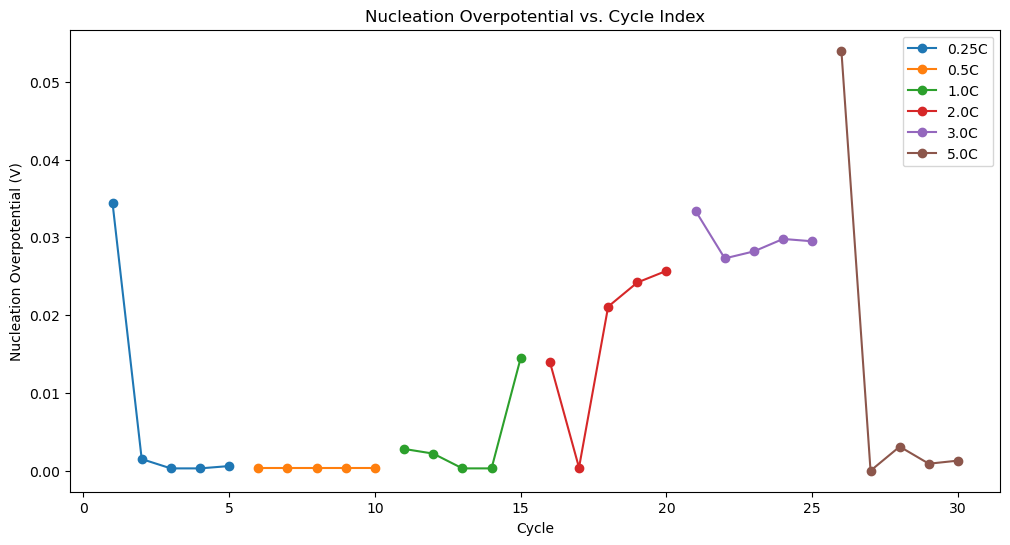

In [11]:
#Nucleation overpotential vs cycle index plot with modified size
plt.figure(figsize=(12, 6))


#gtting crate values from the C-rate column
c_rates= data['C-rate'].unique()

# going through each C-rate and plot the corresponding data
for c_rate in c_rates:
    #filtering the data for the current C-rate
    cycle_data = data[data['C-rate']==c_rate]

#plot the data with a distinct color for each cycle
    plt.plot(
        cycle_data['Cycle Index'], cycle_data['Nucleation Overpotential'], # x and Y-axis data (Cycle Index/Nucleation Overpotential)
         
        marker='o', linestyle='-',            # marker and line styles
        
        label=f'{c_rate}C')                   # label for the legend


plt.xlabel('Cycle')
plt.ylabel('Nucleation Overpotential (V)')
plt.title('Nucleation Overpotential vs. Cycle Index')
plt.legend()
plt.grid(False)

plt.show()


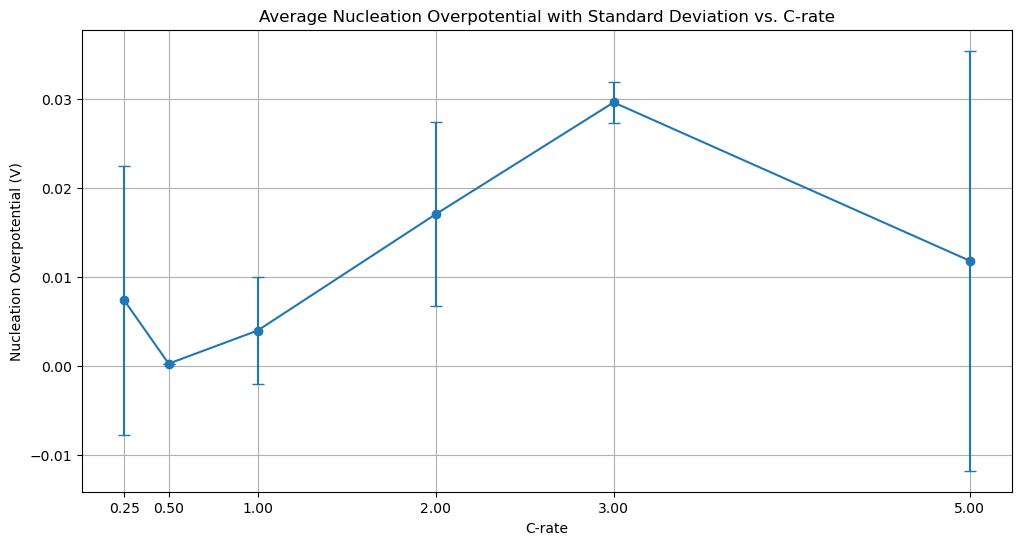

C-rate
0.25    0.00742
0.50    0.00030
1.00    0.00402
2.00    0.01708
3.00    0.02964
5.00    0.01186
Name: Nucleation Overpotential, dtype: float64


In [12]:
#Grouping the data by C-rate values
groupping_by_crate = data.groupby('C-rate')

#to select the 'Nucleation Overpotential' column for each C-rate group
nucleation_overpotential_per_crate= groupping_by_crate['Nucleation Overpotential']

#Mean for each C-rate group
mean_per_crate =nucleation_overpotential_per_crate.mean()

#standard deviation for each C-rate group
std_per_crate =nucleation_overpotential_per_crate.std()

#plot of average nucleation overpotential versus Crate with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(c_rates, mean_per_crate, yerr=std_per_crate,
marker='o', linestyle='-', capsize=4, label='Average Nucleation Overpotential')
plt.xlabel('C-rate')
plt.ylabel('Nucleation Overpotential (V)')
plt.title('Average Nucleation Overpotential with Standard Deviation vs. C-rate')
plt.grid(True)
plt.xticks(c_rates)  # Set x-axis ticks to only C-rate units
plt.show()

#Printing the mean value for each crate

print(mean_per_crate)    
